## ML Model Comparison of data taken from heart-disease-uci 

Analysis of some heart data from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). 
The data contains the following fields:

* age :         Numeric, age in years
* sex :         Numeric, (1 = male; 0 = female)
* cp :          Numeric, chest pain type
* trestbps :    Numeric, resting blood pressure (in mm Hg on admission to the hospital)
* chol :        Numeric, serum cholestoral in mg/dl
* fbs :         Numeric, (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg :     Numeric, resting electrocardiographic results
* thalach :     Numeric, maximum heart rate achieved
* exang :       Numeric, exercise induced angina (1 = yes; 0 = no)
* oldpeak :     Numeric, ST depression induced by exercise relative to rest
* slope :       Numeric, the slope of the peak exercise ST segment
* ca :          Numeric, number of major vessels (0-3) colored by flourosopy
* thal :        Numeric, 3 = normal; 6 = fixed defect; 7 = reversable defect
* target :      Numeric, 1 or 0

### Data and Setup

In [169]:
#  Import numpy and pandas
import numpy as np
import pandas as pd

# Import visualization libraries and set %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [170]:
# Read in the csv file as a dataframe called df
df = pd.read_csv("heart.csv")

In [171]:
# Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [172]:
# Check the head of df 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration & Basic Querying

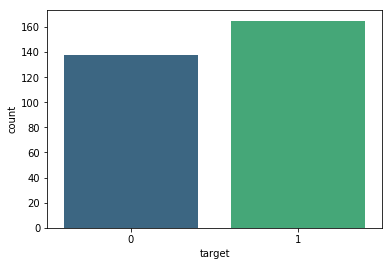

In [173]:
sns.countplot(x="target", data=df, palette="viridis")
plt.show()

In [174]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
totalPatients = len(df)
print("Percentage of Patients without Heart Disease: {:.1f}%".format(countNoDisease / totalPatients*100))
print("Percentage of Patients with Heart Disease: {:.1f}%".format(countHaveDisease / totalPatients*100))

Percentage of Patients without Heart Disease: 45.5%
Percentage of Patients with Heart Disease: 54.5%


What are the top 5 old age records?

In [175]:
df['age'].value_counts().head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

What are the top 5 yung age records?

In [176]:
df['age'].value_counts().tail()

37    2
77    1
76    1
74    1
29    1
Name: age, dtype: int64

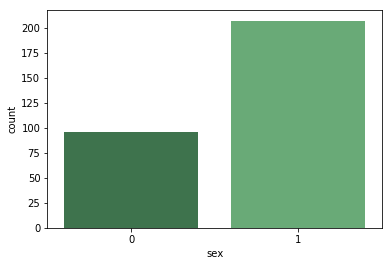

In [177]:
sns.countplot(x='sex',data=df,palette='Greens_d')
plt.show()

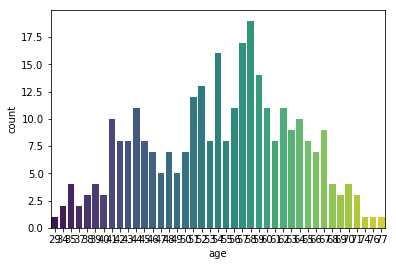

In [178]:
sns.countplot(x='age',data=df,palette='viridis')
plt.show()

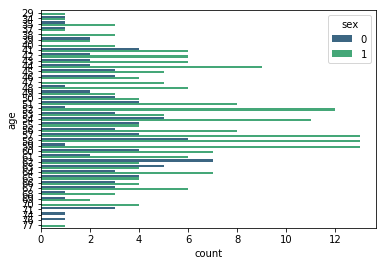

In [179]:
sns.countplot(y="age", hue="sex", data=df, palette="viridis")

plt.show()

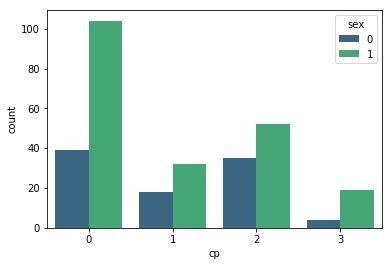

In [180]:
sns.countplot(x="cp", hue="sex", data=df, palette="viridis");

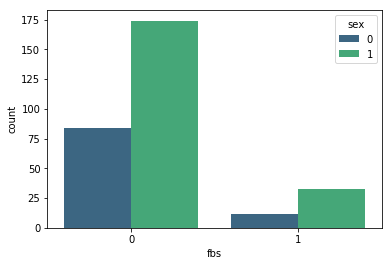

In [181]:
# fasting blood sugar > 120 mg/dl : (1 = true; 0 = false)
sns.countplot(x="fbs", hue="sex", data=df, palette="viridis")
plt.show()

In [201]:
df_male = df[df['sex']==1]
df_male = df_male.drop(columns = ['sex'])
df_male.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,145,233,1,0,150,0,2.3,0,1,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,0,1,187,0,3.5,0,1,...,0,1,0,0,0,1,0,1,0,0
3,56,120,236,0,1,178,0,0.8,0,1,...,1,0,0,0,0,1,0,0,0,1
5,57,140,192,0,1,148,0,0.4,0,1,...,0,0,0,0,1,0,0,0,1,0
7,44,120,263,0,1,173,0,0.0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [202]:
df_female = df[df['sex']==0]
df_female = df_female.drop(columns = ['sex'])
df_female.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
2,41,130,204,0,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,0,1
4,57,120,354,0,1,163,1,0.6,0,1,...,0,0,0,0,0,1,0,0,0,1
6,56,140,294,0,0,153,0,1.3,0,1,...,1,0,0,0,0,1,0,0,1,0
11,48,130,275,0,1,139,0,0.2,0,1,...,0,1,0,0,0,1,0,0,0,1
14,58,150,283,1,0,162,0,1.0,0,1,...,0,0,1,0,0,1,0,0,0,1


In [203]:
df_male_corr = df_male.corr()
df_male_corr

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
age,1.000000,0.254196,0.158983,0.128019,-0.181487,-0.408594,0.152930,0.234677,0.253648,-0.290993,...,-0.131591,-0.079734,0.019993,-0.013825,0.095511,-0.203182,0.150070,0.022177,0.257011,-0.268694
trestbps,0.254196,1.000000,0.085369,0.155453,-0.171975,-0.024399,-0.035431,0.105156,0.032538,-0.065489,...,-0.060551,0.038717,0.163120,-0.012355,0.072956,-0.123900,0.083976,0.045556,0.028614,-0.052989
chol,0.158983,0.085369,1.000000,-0.052741,-0.091180,-0.049573,0.106014,0.050238,0.101658,-0.175665,...,0.017448,-0.110677,-0.031562,-0.057611,-0.085311,-0.022982,0.077530,0.016684,0.114135,-0.122984
fbs,0.128019,0.155453,-0.052741,1.000000,-0.045044,0.046749,-0.034822,-0.042910,0.088892,0.057675,...,-0.076712,0.143320,0.044382,0.159987,0.061998,-0.049984,-0.006886,0.121032,-0.003838,-0.060980
restecg,-0.181487,-0.171975,-0.091180,-0.045044,1.000000,0.088643,-0.099220,-0.032553,-0.046168,0.168234,...,0.125053,0.101068,-0.119456,0.067381,0.013013,-0.040922,0.023912,0.031387,-0.155800,0.138875
thalach,-0.408594,-0.024399,-0.049573,0.046749,0.088643,1.000000,-0.460471,-0.376667,-0.229904,0.485584,...,0.234946,0.221644,0.110330,0.020372,-0.180060,0.299378,-0.199522,-0.039362,-0.469709,0.490435
exang,0.152930,-0.035431,0.106014,-0.034822,-0.099220,-0.460471,1.000000,0.327622,0.125998,-0.393720,...,-0.273806,-0.238359,-0.106194,0.090530,0.024621,-0.290822,0.261056,0.039234,0.274026,-0.294831
oldpeak,0.234677,0.105156,0.050238,-0.042910,-0.032553,-0.376667,0.327622,1.000000,0.125059,-0.393169,...,-0.321531,-0.049466,0.064345,-0.006865,0.084647,-0.283514,0.234384,0.329629,0.365113,-0.541363
ca,0.253648,0.032538,0.101658,0.088892,-0.046168,-0.229904,0.125998,0.125059,1.000000,-0.339703,...,-0.186712,-0.002109,-0.100257,-0.052774,0.036175,-0.142571,0.128215,-0.134816,0.189086,-0.116747
target,-0.290993,-0.065489,-0.175665,0.057675,0.168234,0.485584,-0.393720,-0.393169,-0.339703,1.000000,...,0.285389,0.260601,0.116512,-0.062930,-0.057930,0.431151,-0.385140,-0.006852,-0.383580,0.386961


In [204]:
df_female_corr = df_female.corr()
df_female_corr

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
age,1.000000,0.313959,0.260548,0.124083,-0.012528,-0.405403,0.018810,0.194259,0.392505,-0.207531,...,-0.191565,-0.057105,0.168699,-0.029344,0.025461,-0.153020,0.161964,0.068188,0.014565,-0.044878
trestbps,0.313959,1.000000,0.152388,0.236101,-0.025030,-0.107343,0.318881,0.388379,0.288057,-0.391957,...,-0.125728,-0.204946,0.156483,-0.027149,0.197164,-0.309068,0.277400,0.308914,0.017657,-0.155036
chol,0.260548,0.152388,1.000000,0.143198,-0.269255,0.031100,0.094297,0.116412,0.099305,-0.121769,...,-0.073136,-0.002865,-0.046058,-0.071783,-0.057522,-0.217824,0.265167,-0.132868,-0.037588,0.096644
fbs,0.124083,0.236101,0.143198,1.000000,-0.163384,-0.160302,0.168615,0.112742,0.265043,-0.218218,...,-0.020174,-0.024540,0.078811,-0.038778,0.271448,-0.154705,0.097590,0.053158,-0.102566,0.078811
restecg,-0.012528,-0.025030,-0.269255,-0.163384,1.000000,-0.069620,0.017701,-0.097554,-0.115041,0.032553,...,-0.015048,0.037015,0.066622,-0.106055,-0.106055,0.134880,-0.082496,-0.157717,0.045901,0.024297
thalach,-0.405403,-0.107343,0.031100,-0.160302,-0.069620,1.000000,-0.126448,-0.248973,-0.145191,0.252103,...,0.282025,0.025638,-0.016990,-0.185844,-0.026365,0.305291,-0.261630,-0.102549,-0.297910,0.343198
exang,0.018810,0.318881,0.094297,0.168615,0.017701,-0.126448,1.000000,0.151888,0.024155,-0.486509,...,-0.134933,-0.310029,-0.113692,-0.055941,0.188167,-0.331383,0.311429,0.095275,0.232806,-0.274929
oldpeak,0.194259,0.388379,0.116412,0.112742,-0.097554,-0.248973,0.151888,1.000000,0.461652,-0.500454,...,-0.178929,-0.273179,0.130829,-0.080682,0.177194,-0.465584,0.462508,0.564750,0.196340,-0.447314
ca,0.392505,0.288057,0.099305,0.265043,-0.115041,-0.145191,0.024155,0.461652,1.000000,-0.487205,...,0.001903,-0.254911,-0.012391,-0.064629,0.169499,-0.361619,0.350866,0.226779,0.027539,-0.128375
target,-0.207531,-0.391957,-0.121769,-0.218218,0.032553,0.252103,-0.486509,-0.500454,-0.487205,1.000000,...,0.154083,0.387349,0.120386,0.059235,-0.177705,0.614421,-0.612848,-0.189466,-0.373602,0.457466


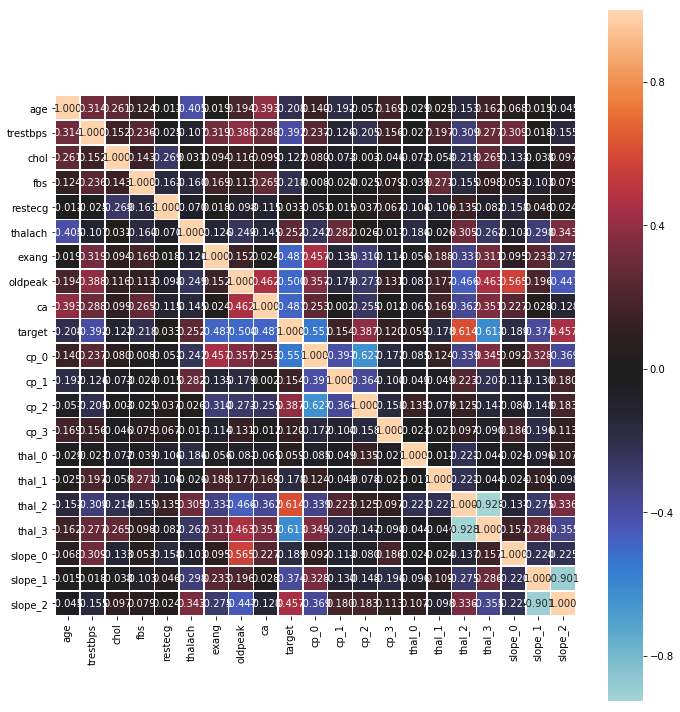

In [205]:
plt.figure(figsize=(10,10))
sns.heatmap(df_female_corr,
            square=True,
            center=0,
            linewidths=.5,
            annot=True,
            fmt='.3f')
plt.tight_layout()

plt.show()

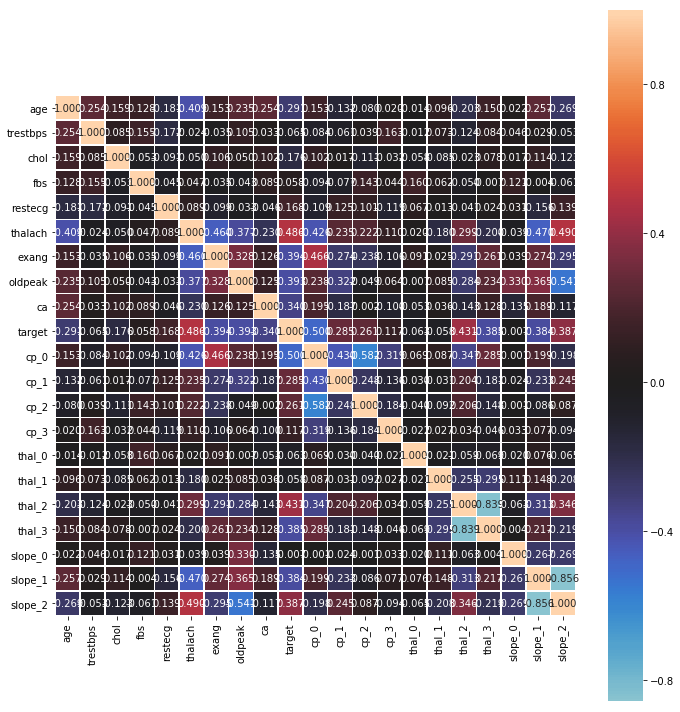

In [206]:
plt.figure(figsize=(10,10))
sns.heatmap(df_male_corr,
            square=True,
            center=0,
            linewidths=.5,
            annot=True,
            fmt='.3f')
plt.tight_layout()

plt.show()

In [207]:
df_corr_pearson = df.corr('pearson')
df_corr_pearson

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,0.276326,...,-0.147399,-0.059432,0.047516,-0.016779,0.063758,-0.135891,0.110752,0.030536,0.177201,-0.192580
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,0.118261,...,-0.041249,-0.116588,0.088043,-0.032093,0.141135,-0.376365,0.321559,0.046183,-0.009157,-0.014356
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,0.101389,...,-0.081851,-0.045107,0.151343,-0.016870,0.076369,-0.140712,0.109573,0.122384,0.025207,-0.087472
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,0.070511,...,-0.012750,-0.037918,-0.050589,-0.057127,-0.093560,-0.004591,0.059621,-0.045340,0.051177,-0.028054
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,0.137979,...,-0.060649,0.083679,0.055511,0.080568,0.091351,-0.086774,0.030953,0.105284,-0.033360,-0.020255
restecg,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,-0.072042,...,0.077859,0.084196,-0.074654,-0.004356,-0.013429,0.029597,-0.023012,-0.026958,-0.087349,0.100989
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,-0.213177,...,0.248317,0.165475,0.079082,-0.050429,-0.159748,0.294801,-0.215417,-0.056590,-0.419627,0.448043
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,0.115739,...,-0.233863,-0.271028,-0.093384,0.030113,0.063073,-0.328539,0.300223,0.059253,0.257687,-0.287606
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,0.222682,...,-0.277513,-0.132444,0.086959,-0.037946,0.104635,-0.339086,0.302145,0.394253,0.310986,-0.511356
ca,0.276326,0.118261,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,1.000000,...,-0.134715,-0.088998,-0.070496,-0.058236,0.066618,-0.221331,0.203601,-0.042218,0.141923,-0.120306


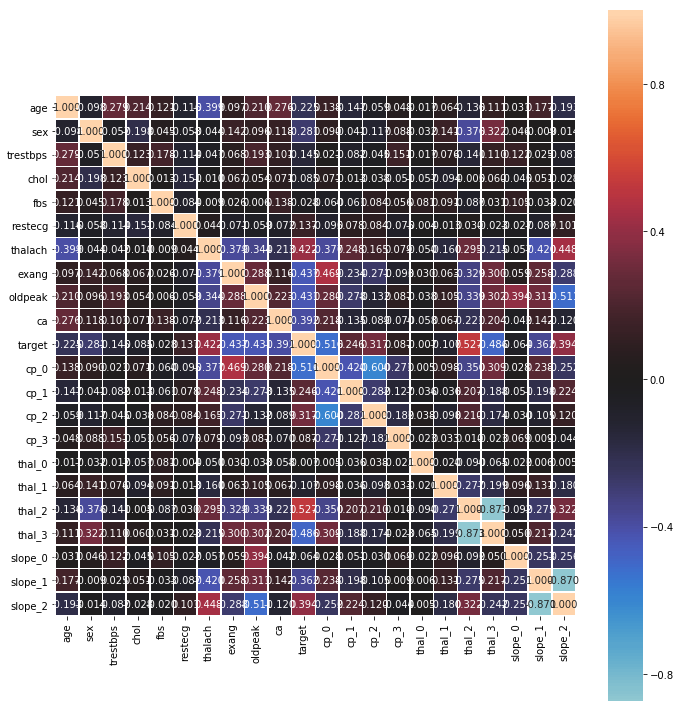

In [208]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr_pearson,
            square=True,
            center=0,
            linewidths=.5,
            annot=True,
            fmt='.3f')
plt.tight_layout()

plt.show()

In [195]:
df_corr_spearman = df.corr(method='spearman')
df_corr_spearman

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.340955,0.087254,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.119368,0.250821,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.216006,-0.207840,0.460860
trestbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.090140,0.059673,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.111981,0.083628,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.097862,-0.010982,0.148612
thalach,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.257347,-0.160581,0.428370
exang,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.162025,0.247113,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.224895,0.255026,-0.421487


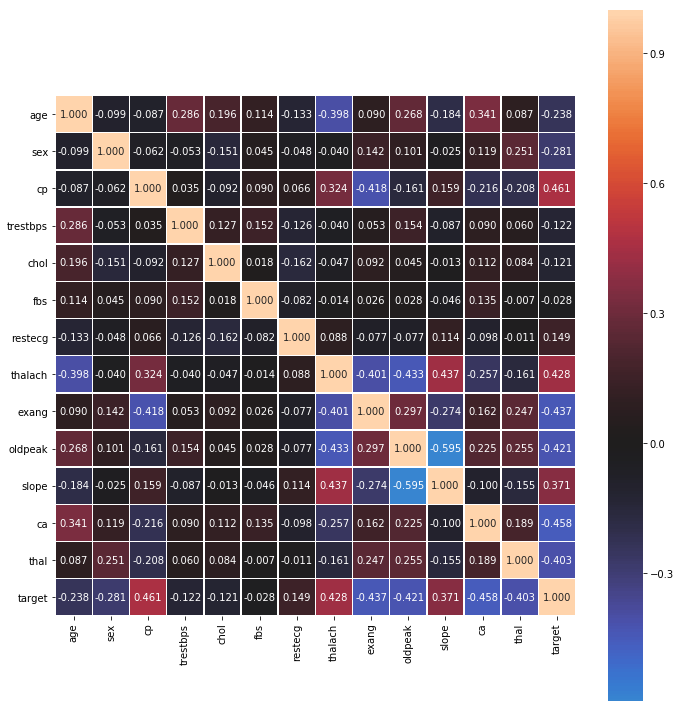

In [196]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr_spearman,
            square=True,
            center=0,
            linewidths=.5,
            annot=True,
            fmt='.3f')
plt.tight_layout()

plt.show()

## Preparing the data for Analysis

#### change enums to columns 

In [197]:
# create new columns
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [198]:
# concat the new columns
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [199]:
# drop the enum columns that were transfered into the new colomns
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [141]:
# Split the dataframe into x_data matrix and y vector

y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [209]:
# Normalize the x_data

min_x_data = np.min(x_data)
max_x_data = np.max(x_data)

x = (x_data - min_x_data) / (max_x_data - min_x_data).values

In [210]:
# Split the x_data. 
# train data = 80% of the data
# test data = 20% of the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

## Data Analysis

In [211]:
from sklearn.metrics import confusion_matrix

In [212]:
def print_cm_stats(cm):
    [TN, FP], [FN, TP] = cm
    total = TN+FP+FN+TP
    
    actual_no     = TN+FP
    actual_yes    = FN+TP
    predicted_yes = FP+TP
    predicted_no  = FN+TN


    # Overall, how often is the classifier correct?
    Accuracy =  (TP+TN)/total 

    # Overall, how often is it wrong?
    # also known as "Error Rate"
    # equivalent to 1 minus Accuracy
    Misclassification_Rate = (FP+FN)/total 

    # When it's actually yes, how often does it predict yes?
    # also known as "Sensitivity" or "Recall"
    TP_Rate = TP/actual_yes

     #When it's actually no, how often does it predict yes?
    FP_Rate = FP/actual_no


    # When it's actually no, how often does it predict no?
    # equivalent to 1 minus False Positive Rate
    # also known as "Specificity"
    TN_Rate = TN/actual_no 

    # When it predicts yes, how often is it correct?
    Precision = TP/predicted_yes

    # How often does the yes condition actually occur in our sample?
    Prevalence = actual_yes/total 

    # calculate F1Score 
    F1 = 2 * (Precision * TP_Rate) / (Precision + TP_Rate)

    print("Accuracy: {:.2f}%".format(Accuracy*100))
    print("Misclassification_Rate: {:.2f}%".format(Misclassification_Rate*100)) 
    print("TP_Rate: {:.2f}%".format(TP_Rate*100)) 
    print("FP_Rate: {:.2f}%".format(FP_Rate*100)) 
    print("TN_Rate: {:.2f}%".format(TN_Rate*100)) 
    print("Precision: {:.2f}%".format(Precision*100)) 
    print("Prevalence: {:.2f}%".format(Prevalence*100)) 
    print("F1Score: {:.2f}%".format(F1*100)) 

### Predict if a patient has this disease or not

#### 1. LogisticRegression Algorithm 

In [213]:
# LogisticRegression Algorithm 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
LogisticRegression_score = lr.score(x_test,y_test)*100
print("Logistic Regression Accuracy {:.2f}%".format(LogisticRegression_score))

Logistic Regression Accuracy 86.89%


In [214]:
y_head_lr = lr.predict(x_test)
cm_lr = confusion_matrix(y_test,y_head_lr)

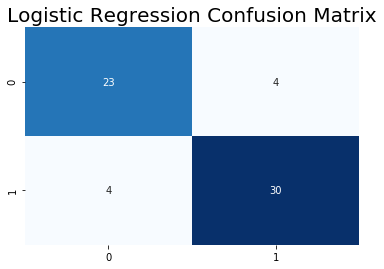

In [215]:
plt.title("Logistic Regression Confusion Matrix", fontsize=20)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [216]:
print_cm_stats(cm_lr)

Accuracy: 86.89%
Misclassification_Rate: 13.11%
TP_Rate: 88.24%
FP_Rate: 14.81%
TN_Rate: 85.19%
Precision: 88.24%
Prevalence: 55.74%
F1Score: 88.24%


#### 2. Random Forest Classification Algorithm

In [217]:
# Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rand_forest.fit(x_train, y_train)

Random_Forest_score = rand_forest.score(x_test,y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(Random_Forest_score))

Random Forest Algorithm Accuracy Score : 88.52%


In [218]:
y_head_rand_forest = rand_forest.predict(x_test)
cm_rand_forest = confusion_matrix(y_test,y_head_lr)

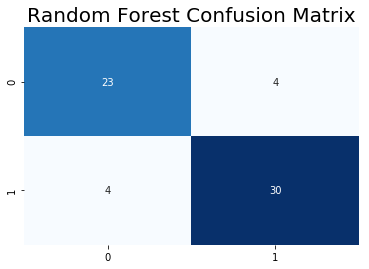

In [219]:
plt.title("Random Forest Confusion Matrix", fontsize=20)
sns.heatmap(cm_rand_forest,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [220]:
calc_x(cm_rand_forest)

NameError: name 'calc_x' is not defined

#### 3. K Nearest Neighbors 

In [221]:
# KNN Model where k = 2
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn2.fit(x_train, y_train)
prediction = knn2.predict(x_test)

print("KNN with K={} Accuracy Score: {:.2f}%".format(2, knn2.score(x_test, y_test)*100))

KNN with K=2 Accuracy Score: 77.05%


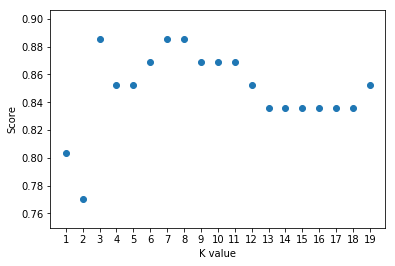

Maximum KNN Score is 88.52% for K= 3


In [222]:
# Find the best k value for KNN
scoreList = []
for k in range(1,20):
    max_knn = KNeighborsClassifier(n_neighbors = k)  # n_neighbors means k
    max_knn.fit(x_train, y_train)
    scoreList.append(max_knn.score(x_test, y_test))
    
plt.scatter(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


max_k_value = max(scoreList)
k_max = scoreList.index(max_k_value)+1

KNN_score = max_k_value *100
print("Maximum KNN Score is {:.2f}% for K= {}".format((KNN_score),k_max))

In [223]:
#knn3 = KNeighborsClassifier(n_neighbors = 3)
#knn3.fit(x_train, y_train)
y_head_knn = max_knn.predict(x_test)

cm_knn = confusion_matrix(y_test,y_head_knn)

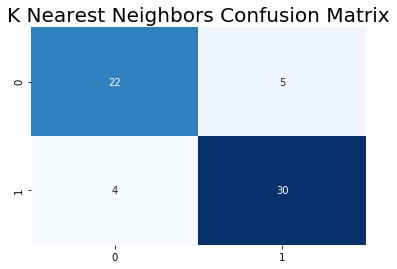

In [224]:
plt.title("K Nearest Neighbors Confusion Matrix", fontsize=20)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [225]:
print_cm_stats(cm_knn)

Accuracy: 85.25%
Misclassification_Rate: 14.75%
TP_Rate: 88.24%
FP_Rate: 18.52%
TN_Rate: 81.48%
Precision: 85.71%
Prevalence: 55.74%
F1Score: 86.96%


#### 4. Support Vector Machine (SVM) Algorithm

In [226]:
# Support Vector Machine (SVM) Algorithm
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

SVM_score = svm.score(x_test,y_test)*100
print("SVM Algorithm Accuracy Score: {:.2f}%".format(SVM_score))

SVM Algorithm Accuracy Score: 86.89%


In [227]:
y_head_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test,y_head_svm)

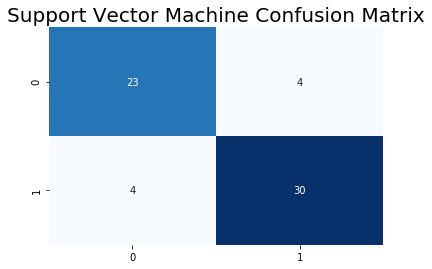

In [228]:
plt.title("Support Vector Machine Confusion Matrix", fontsize=20)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [229]:
print_cm_stats(cm_svm)

Accuracy: 86.89%
Misclassification_Rate: 13.11%
TP_Rate: 88.24%
FP_Rate: 14.81%
TN_Rate: 85.19%
Precision: 88.24%
Prevalence: 55.74%
F1Score: 88.24%


#### 5. Naive Bayes Algorithm

In [230]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

Naive_Bayes_score = nb.score(x_test,y_test)*100
print("Naive Bayes Accuracy Score: {:.2f}%".format(Naive_Bayes_score))

Naive Bayes Accuracy Score: 86.89%


In [231]:
y_head_nb = nb.predict(x_test)
cm_nb = confusion_matrix(y_test,y_head_nb)

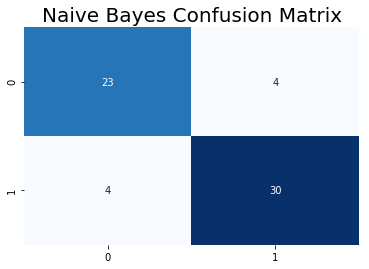

In [232]:
plt.title("Naive Bayes Confusion Matrix", fontsize=20)
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [233]:
print_cm_stats(cm_nb)

Accuracy: 86.89%
Misclassification_Rate: 13.11%
TP_Rate: 88.24%
FP_Rate: 14.81%
TN_Rate: 85.19%
Precision: 88.24%
Prevalence: 55.74%
F1Score: 88.24%


#### 6. Decision Tree Algorithm

In [234]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

Decision_Tree_score = dtc.score(x_test, y_test)*100
print("Decision Tree Accuracy Score {:.2f}%".format(Decision_Tree_score))

Decision Tree Accuracy Score 80.33%


In [235]:
y_head_dtc = dtc.predict(x_test)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

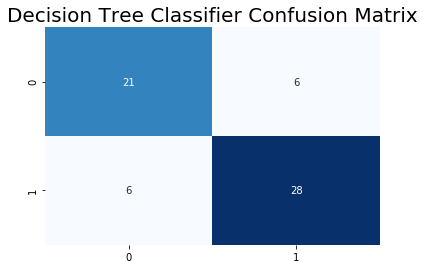

In [236]:
plt.title("Decision Tree Classifier Confusion Matrix", fontsize=20)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [237]:
print_cm_stats(cm_dtc)

Accuracy: 80.33%
Misclassification_Rate: 19.67%
TP_Rate: 82.35%
FP_Rate: 22.22%
TN_Rate: 77.78%
Precision: 82.35%
Prevalence: 55.74%
F1Score: 82.35%


## Models Comparison

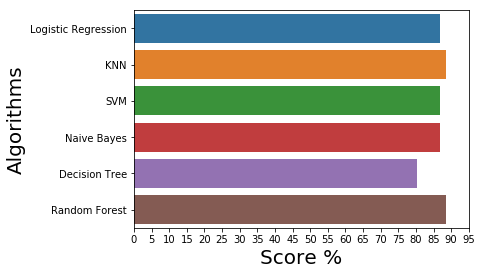

Best Accuracy Score Algorithm is KNN with result of 88.52%


In [238]:
algorithms = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
score = [LogisticRegression_score,KNN_score, SVM_score, Naive_Bayes_score, Decision_Tree_score, Random_Forest_score]

sns.barplot(x=score, y=algorithms)
plt.xlabel("Score %", fontsize=20)
plt.ylabel("Algorithms", fontsize=20)
plt.rcParams.update({'font.size': 12})
plt.xticks(np.arange(0,100,5))
plt.show()

best_score_value = max(score)
best_score = algorithms[score.index(best_score_value)]

print("Best Accuracy Score Algorithm is {} with result of {:.2f}%".format(best_score, best_score_value))